## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [35]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [36]:
customer_set = pd.read_csv("Mall_Customers.csv")
customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"}, inplace=True)

print(customer_set)

     CustomerID  Gender  Age  Income  SpendingScore
0             1    Male   19      15             39
1             2    Male   21      15             81
2             3  Female   20      16              6
3             4  Female   23      16             77
4             5  Female   31      17             40
..          ...     ...  ...     ...            ...
195         196  Female   35     120             79
196         197  Female   45     126             28
197         198    Male   32     126             74
198         199    Male   32     137             18
199         200    Male   30     137             83

[200 rows x 5 columns]


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [6]:
print("Attributes of the dataset:")
print(customer_set.columns)


print("\nDimensionality of the dataset:")
print(customer_set.shape)


print("\nBasic statistical information:")
print(customer_set.describe())


print("\nChecking for NaN values:")
print(customer_set.isna().sum())

Attributes of the dataset:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

Dimensionality of the dataset:
(200, 5)

Basic statistical information:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

Checking for NaN values:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [37]:
customer_set.drop(columns=['CustomerID'], inplace=True)


print(customer_set)

     Gender  Age  Income  SpendingScore
0      Male   19      15             39
1      Male   21      15             81
2    Female   20      16              6
3    Female   23      16             77
4    Female   31      17             40
..      ...  ...     ...            ...
195  Female   35     120             79
196  Female   45     126             28
197    Male   32     126             74
198    Male   32     137             18
199    Male   30     137             83

[200 rows x 4 columns]


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

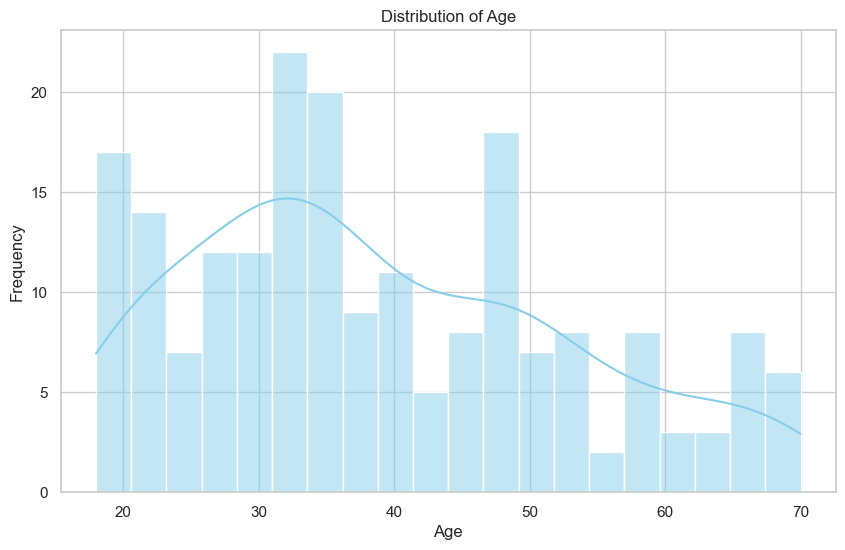

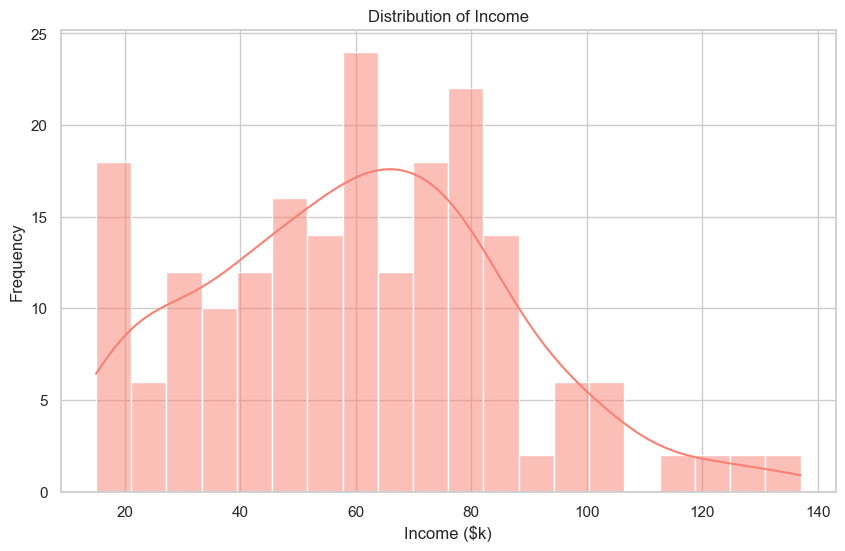

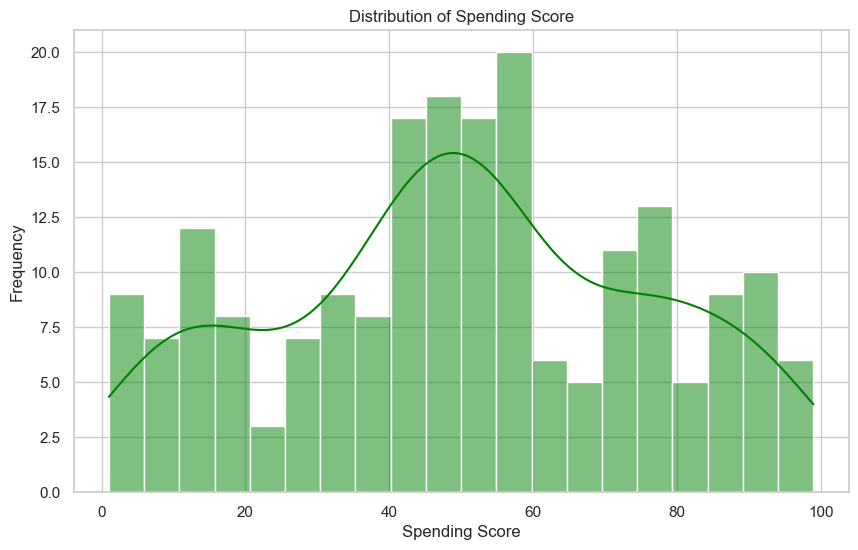

In [8]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', bins=20, kde=True, color='salmon')
plt.title('Distribution of Income')
plt.xlabel('Income ($k)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', bins=20, kde=True, color='green')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

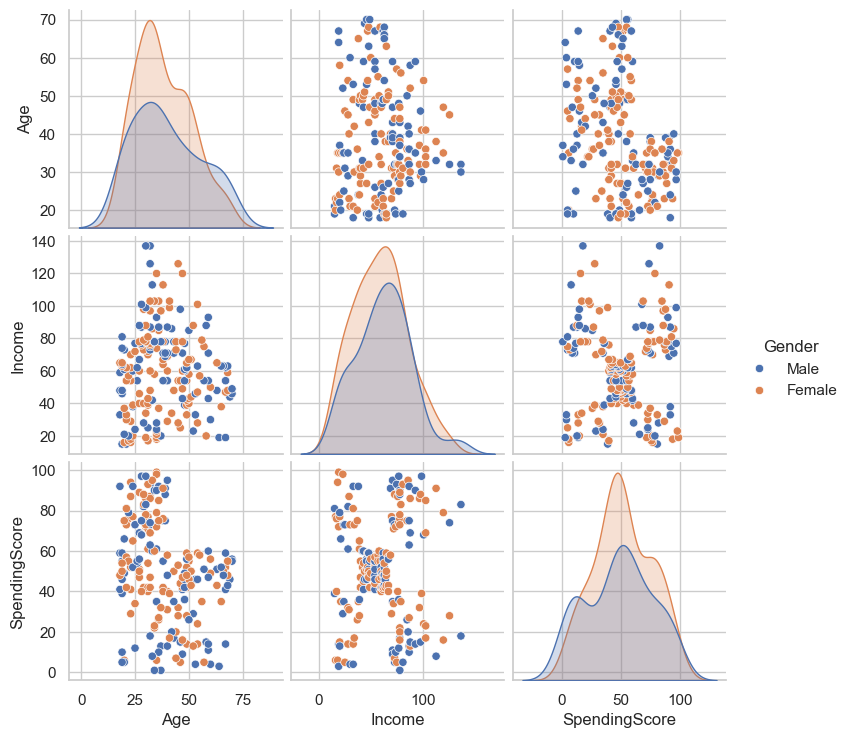

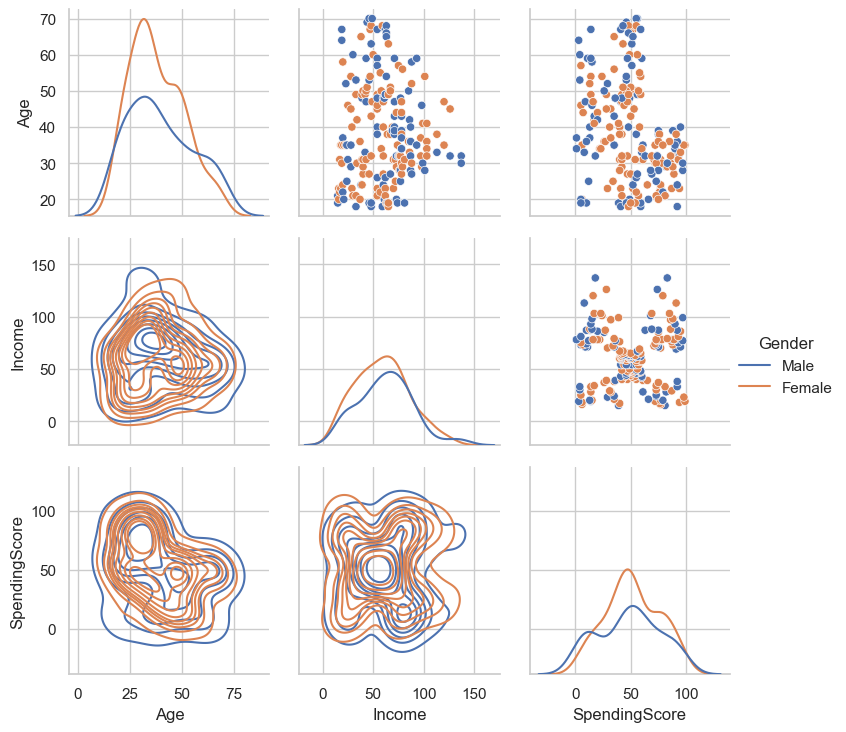

In [10]:
sns.pairplot(customer_set, hue='Gender')

g = sns.PairGrid(customer_set, hue='Gender')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)
g.add_legend()
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.Було розглянуто атрибути набору даних і ми переконались, що він містить такі змінні, як Age, Income та SpendingScore.
Також перевірили основну статистичну інформацію та відсутність пропущених значень в датасеті.   

2.Видалили стовпець CustomerID, оскільки він не впливає на аналіз даних та не має значення для подальшої роботи. 

3.Було побудовано гістограми для змінних Age, Income та SpendingScore, які дозволяють нам побачити їхні розподіли та розуміти характеристики кожної змінної.

4.Було проаналізовано взаємозв'язки між змінними Age, Income, SpendingScore та Gender за допомогою діаграм розподілу та pairplot. Це дозволяє нам зрозуміти, як вони відрізняються залежно від статі.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Gender correlation:
Gender
Female    112
Male       88
Name: count, dtype: int64


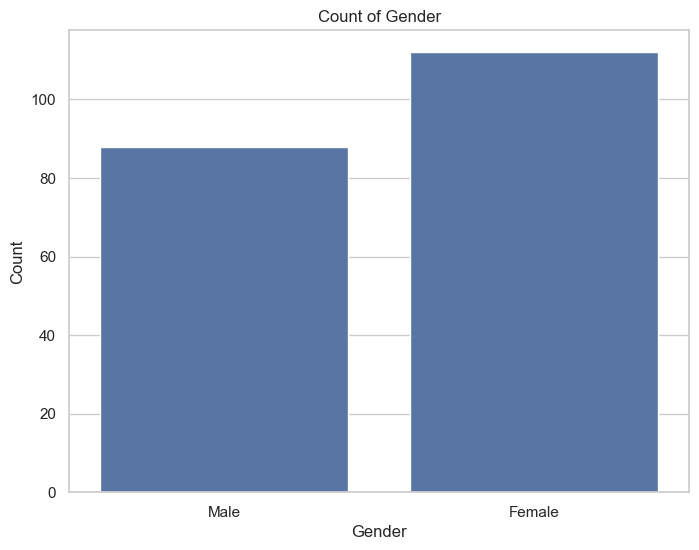

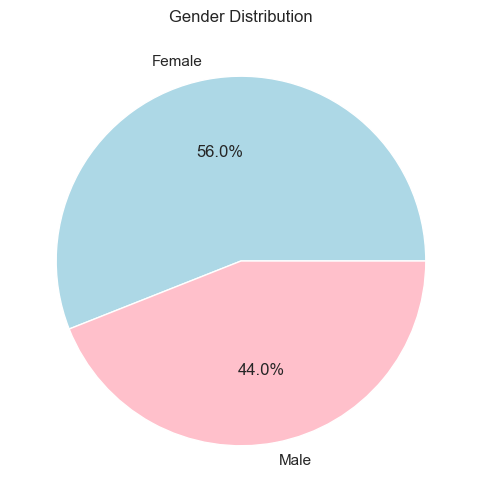

In [13]:
gender_counts = customer_set['Gender'].value_counts()

print("Gender correlation:")
print(gender_counts)


plt.figure(figsize=(8, 6))
sns.countplot(data=customer_set, x='Gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.show()


**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

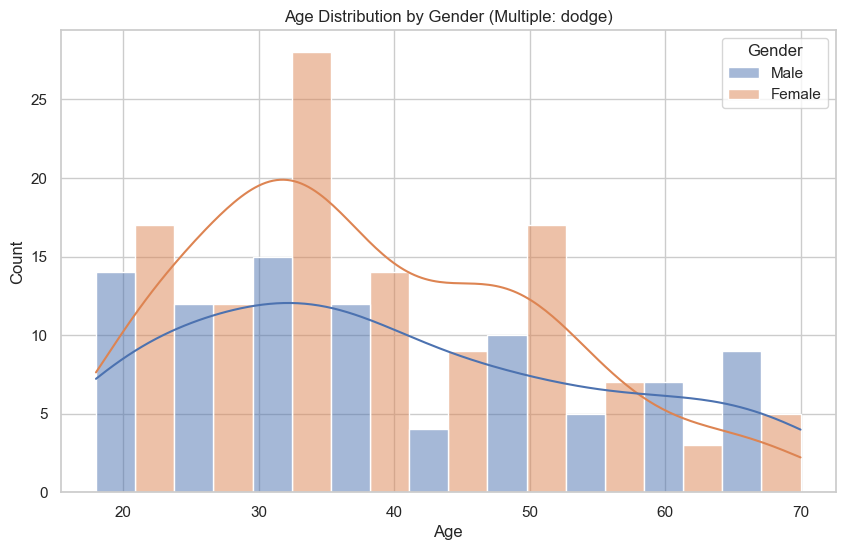

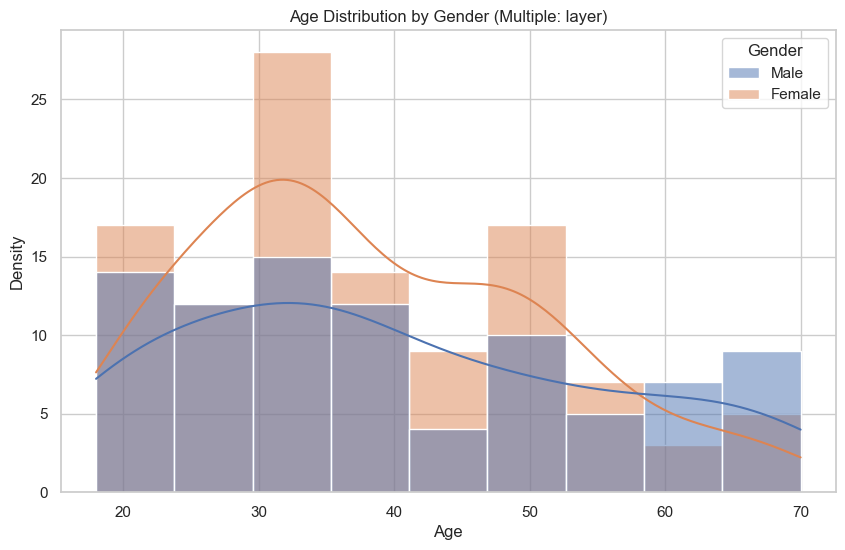

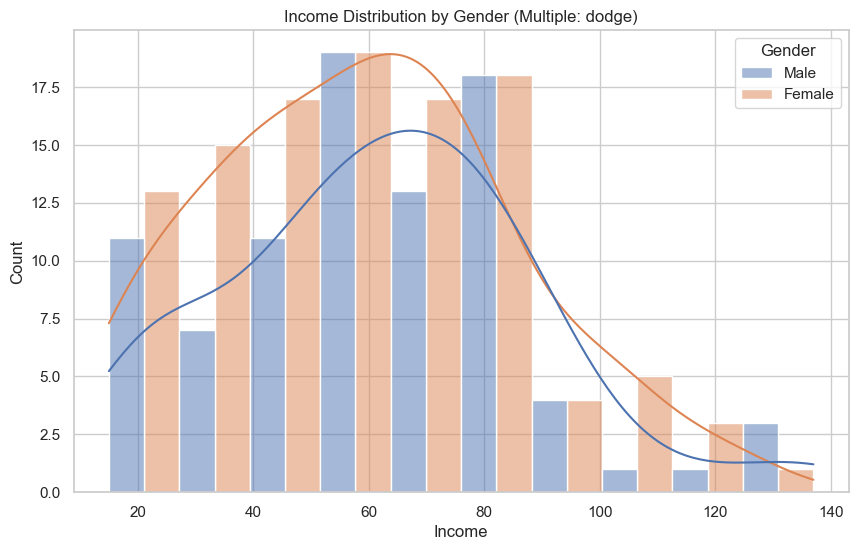

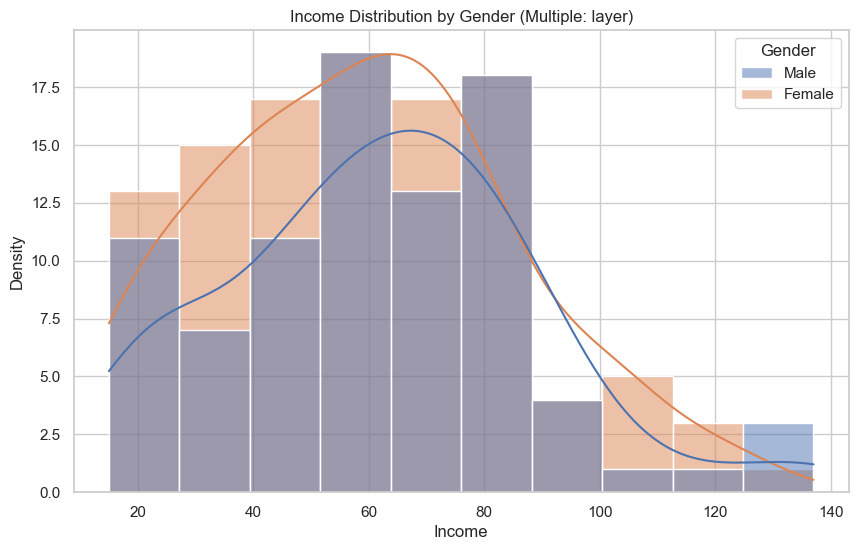

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', kde=True)
plt.title('Age Distribution by Gender (Multiple: dodge)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', kde=True)
plt.title('Age Distribution by Gender (Multiple: layer)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', kde=True)
plt.title('Income Distribution by Gender (Multiple: dodge)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', kde=True)
plt.title('Income Distribution by Gender (Multiple: layer)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



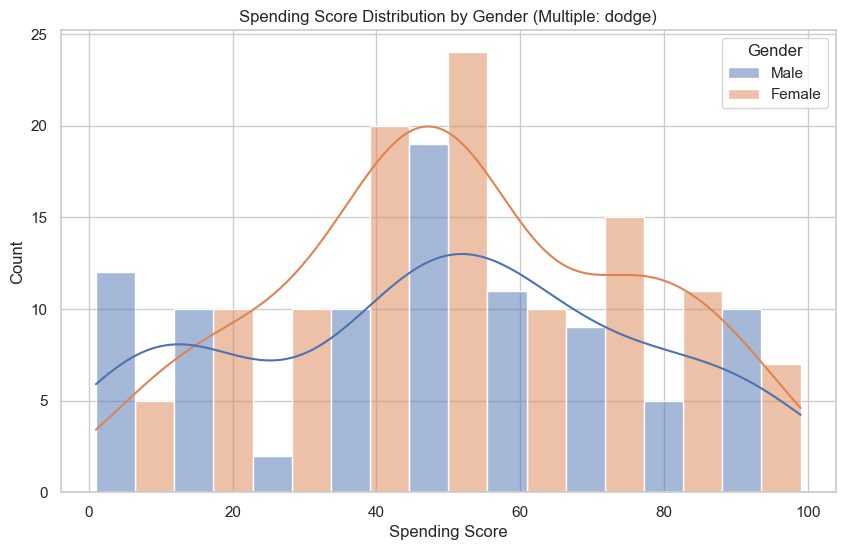

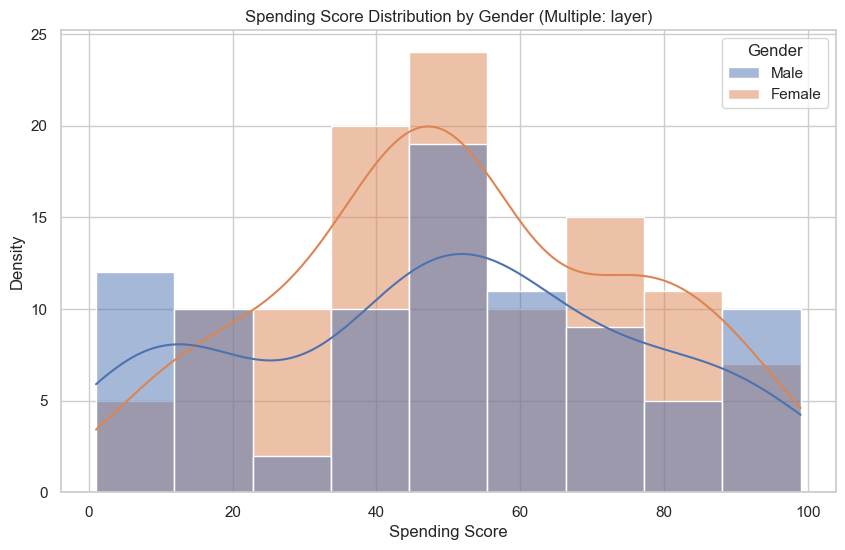

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', kde=True)
plt.title('Spending Score Distribution by Gender (Multiple: dodge)')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', kde=True)
plt.title('Spending Score Distribution by Gender (Multiple: layer)')
plt.xlabel('Spending Score')
plt.ylabel('Density')
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

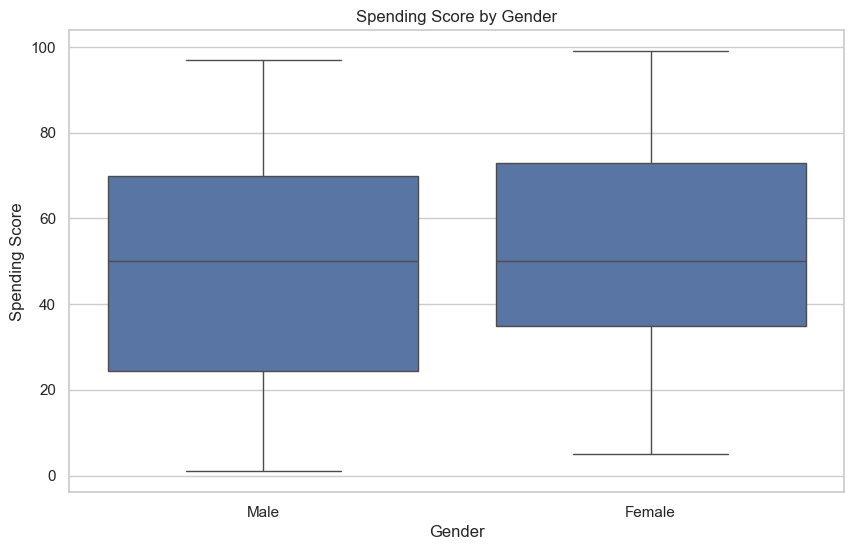

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_set, x='Gender', y='SpendingScore')
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

5.   Під час аналізу виявлено, що у нашому наборі даних кількість чоловіків та жінок розподілена приблизно однаково
6. Клієнти є з різними рівнями витрат та доходів. Деякі клієнти витрачають більше та мають вищий дохід, інші - менше витрачають та мають нижчий дохід. 
7. Є деяка різниця у витратах між чоловіками та жінками. Це може бути пов'язано з різними уподобаннями.
8. На графіку можна побачити, що розподіл витрат у чоловіків та жінок має деякі незначні відмінності. 



## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

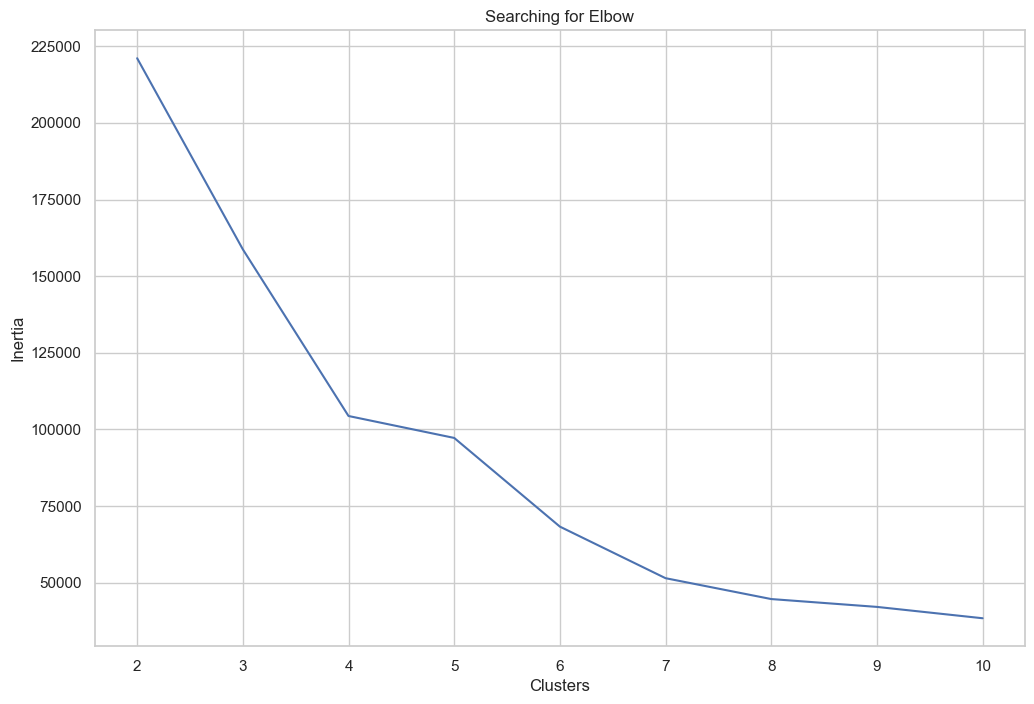

In [21]:
from sklearn.cluster import KMeans

X = customer_set.drop(['Gender'], axis=1)

min_clusters = 2
max_clusters = 10


clusters = []
for i in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(min_clusters, max_clusters+1)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

**Висновки з завдання 9 (детальні)** 

1.Оптимальна кількість кластерів відповідає точці, де зміна вкладення кластерів стає меншою. Щодо отриманого графіка можна припустити, що оптимальна кількість кластерів може бути 5 або 6. 

2.Також є методи такі як silhouette analysis або Gap statistic.
Silhouette analysis вимірює, наскільки кожен об'єкт подібний до свого власного кластера порівняно з іншими кластерами. Він надає оцінку, яка може допомогти визначити, яка кількість кластерів має найкращу "структуру".
Gap statistic порівнює внутрішню дисперсію кластерів з тим, що можна очікувати випадково, і допомагає визначити, яка кількість кластерів є найменш випадковою.


**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

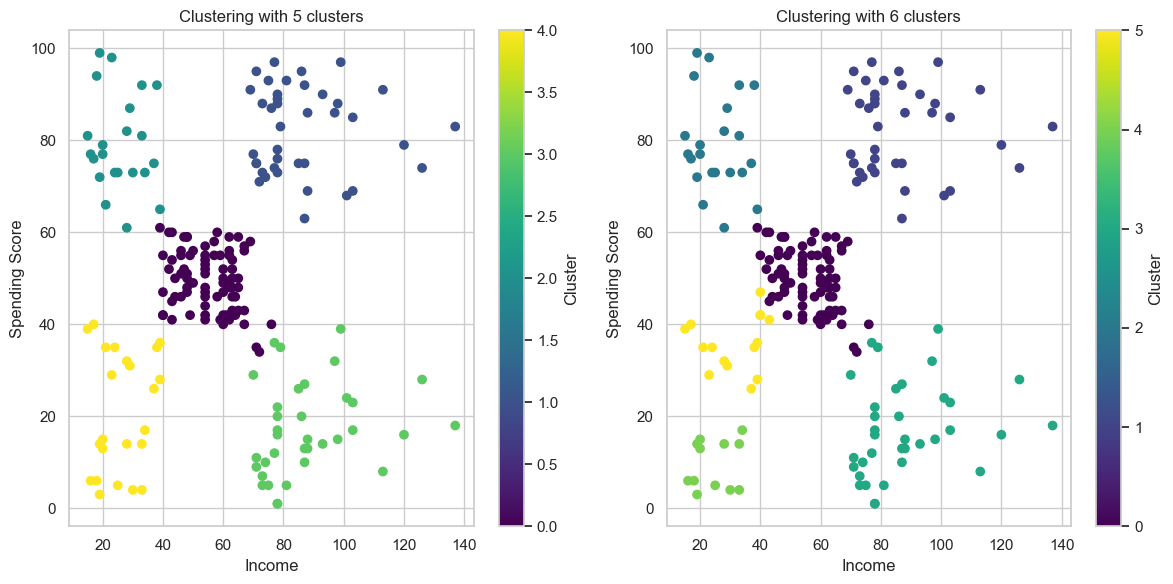

In [22]:
X = customer_set[['Income', 'SpendingScore']]

kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(X)
labels_5 = kmeans_5.labels_

kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(X)
labels_6 = kmeans_6.labels_


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X['Income'], X['SpendingScore'], c=labels_5, cmap='viridis')
plt.title('Clustering with 5 clusters')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(X['Income'], X['SpendingScore'], c=labels_6, cmap='viridis')
plt.title('Clustering with 6 clusters')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [41]:
from sklearn.cluster import KMeans
import plotly.express as px


kmeans = KMeans(n_clusters=3)
customer_set['Cluster'] = kmeans.fit_predict(customer_set[['Income', 'SpendingScore']])


fig = px.scatter_3d(customer_set, x='Income', y='SpendingScore', z='Cluster', color='Cluster',
                    symbol='Cluster', opacity=0.8, title='Clustering with 3 clusters')
pio.show(fig, renderer='browser')

**Висновки з завдання 10 - 11 (детальні)** 

1. З графіків видно, що можна виділити 5 або 6 груп клієнтів з різними доходами та витратами.  
2. Перший графік показує, як клієнти розділені за доходами та витратами на 5 груп. Другий графік демонструє більш детальний розподіл клієнтів на 6 груп, але може бути складніше зрозуміти та аналізувати.

3.Графік 3D scatter показує розподіл клієнтів у тривимірному просторі з врахуванням доходу, витрат та номеру кластера. Кластери відокремлені за кольором та символом, що дозволяє швидко визначити, які клієнти належать до однієї групи. Графік допомагає спостерігати, як змінюються характеристики клієнтів відносно різних кластерів, наприклад, чи є які-небудь очевидні тенденції чи відмінності між ними.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


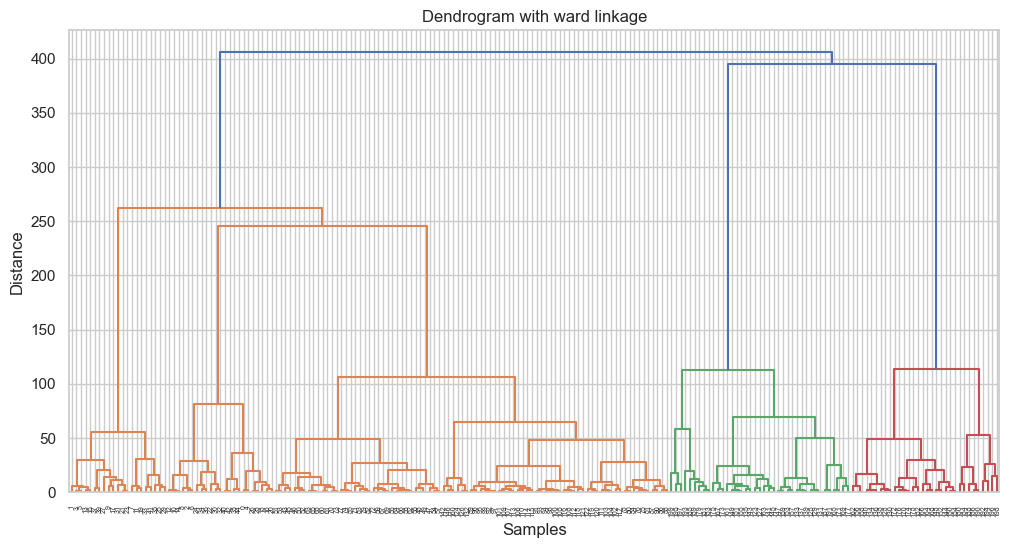

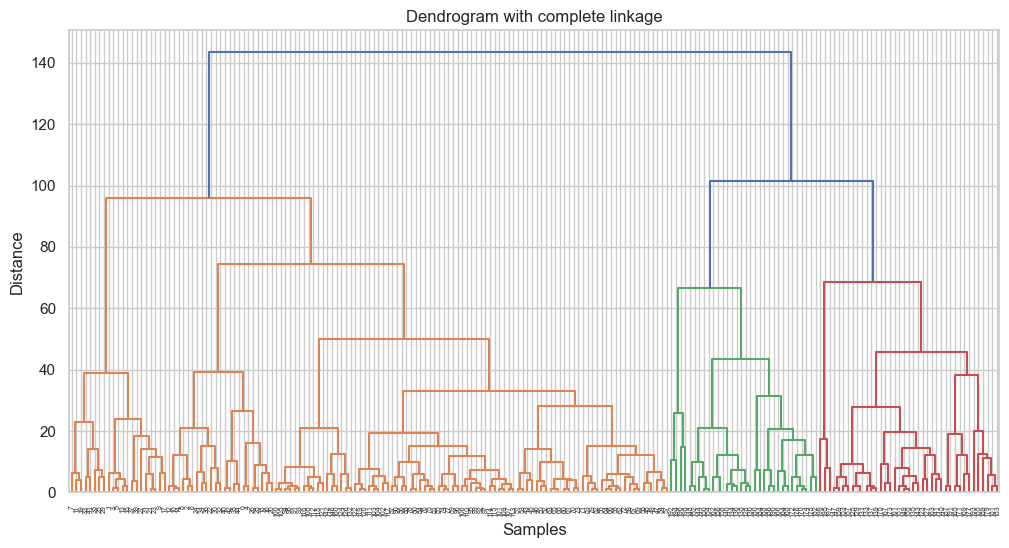

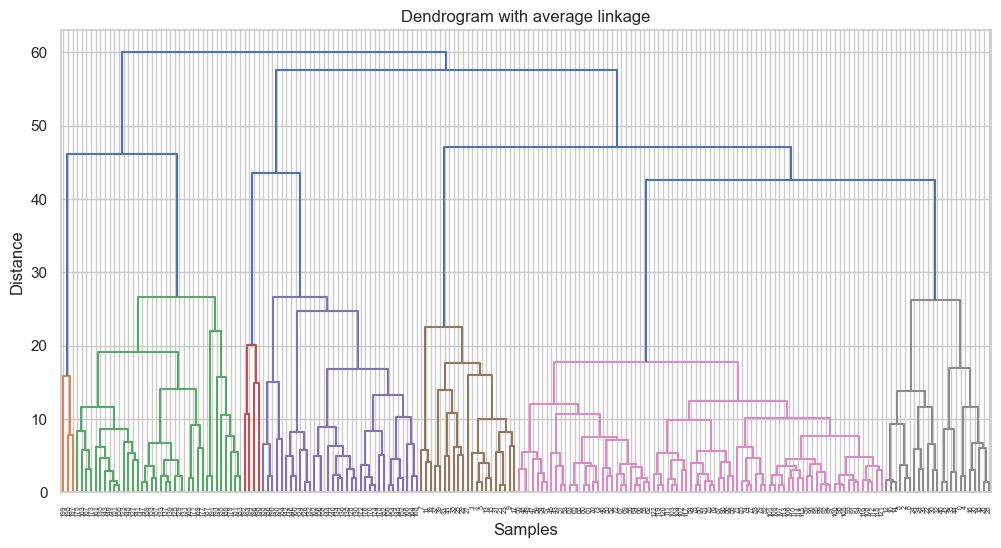

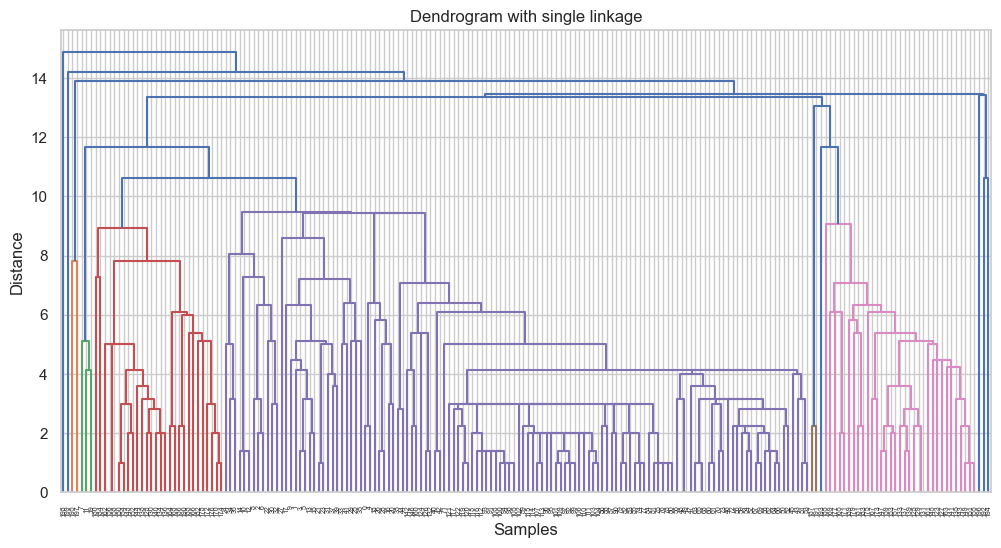

In [50]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy


for linkage_type in ['ward', 'complete', 'average', 'single']:
   
    clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage_type)
    
    labels = clustering.fit_predict(X)
    
    
    Z = hierarchy.linkage(X, method=linkage_type)
    plt.figure(figsize=(12, 6))
    dn = hierarchy.dendrogram(Z)
    plt.title(f'Dendrogram with {linkage_type} linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

**Висновки з завдання 12 (детальні)**

1. Різні методи linkage викликають різні форми та структури кластерів. Ward linkage дає чіткі та компактні кластери, complete linkage призводить до кластерів з різною густотою, average linkage формує більш однорідні кластери, а single linkage характеризується вузькими кластерами з меншою гомогенністю. 



**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

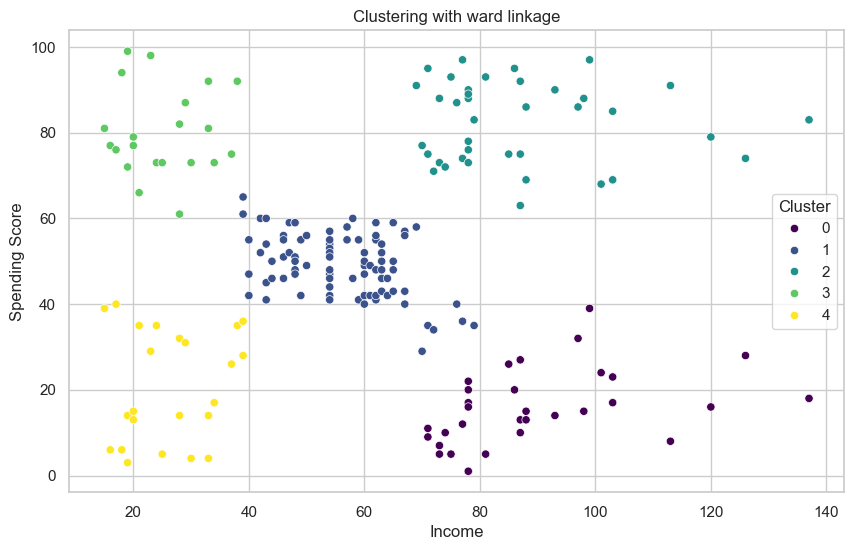

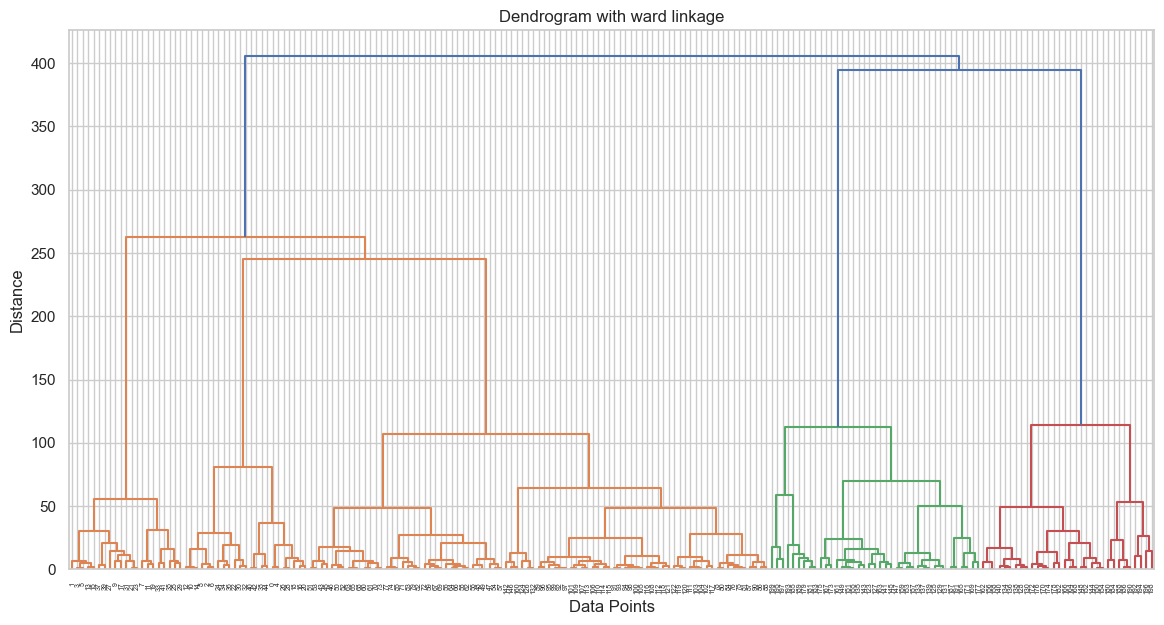

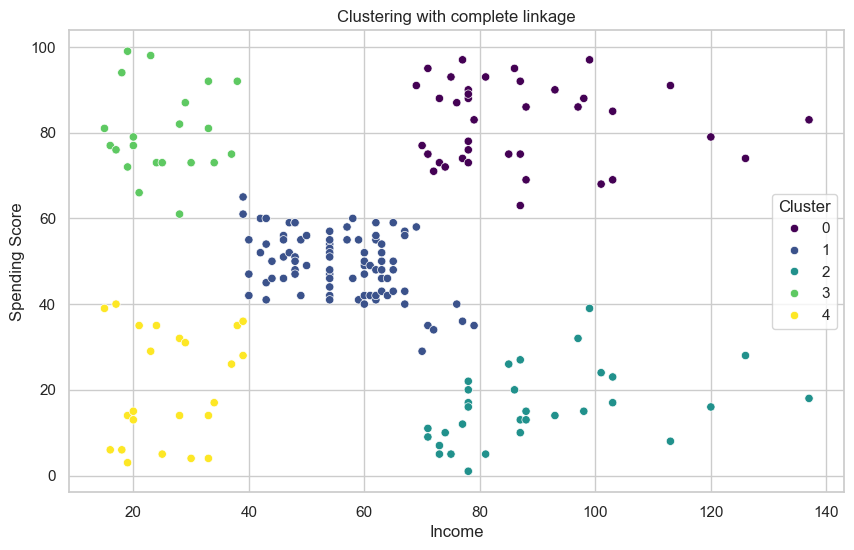

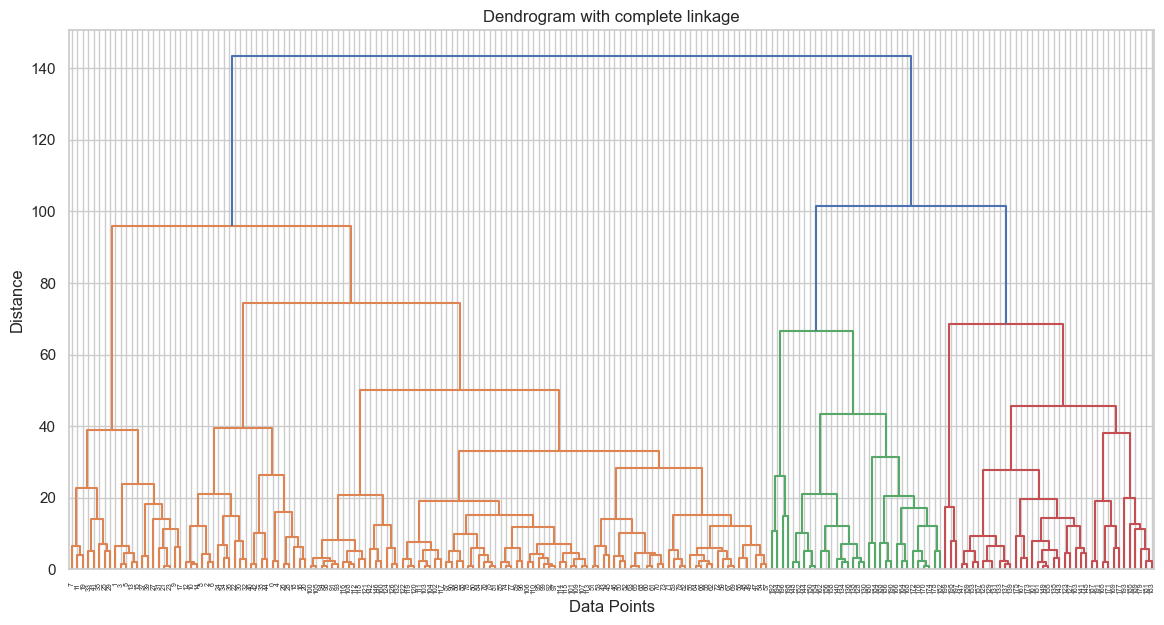

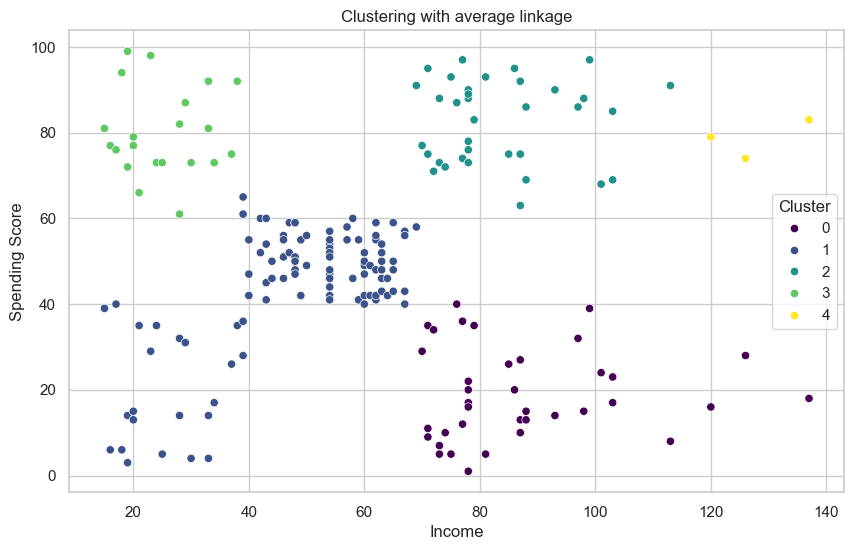

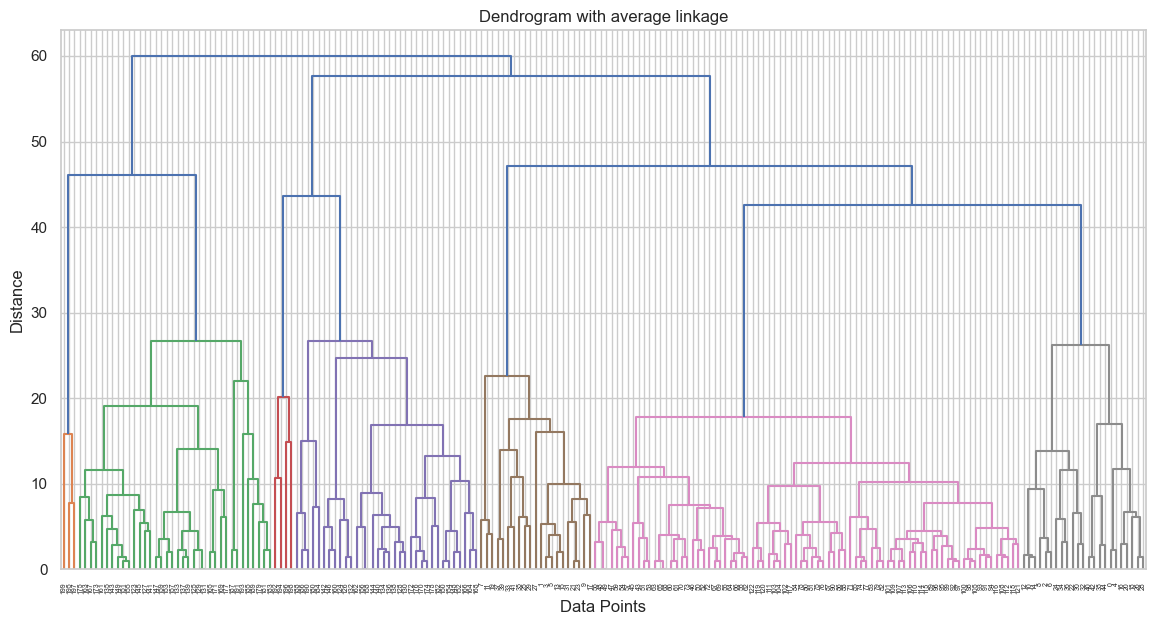

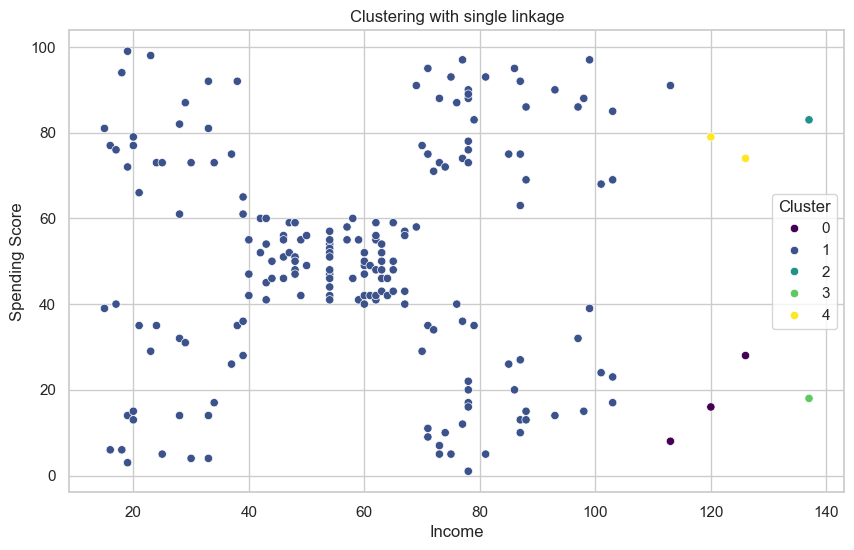

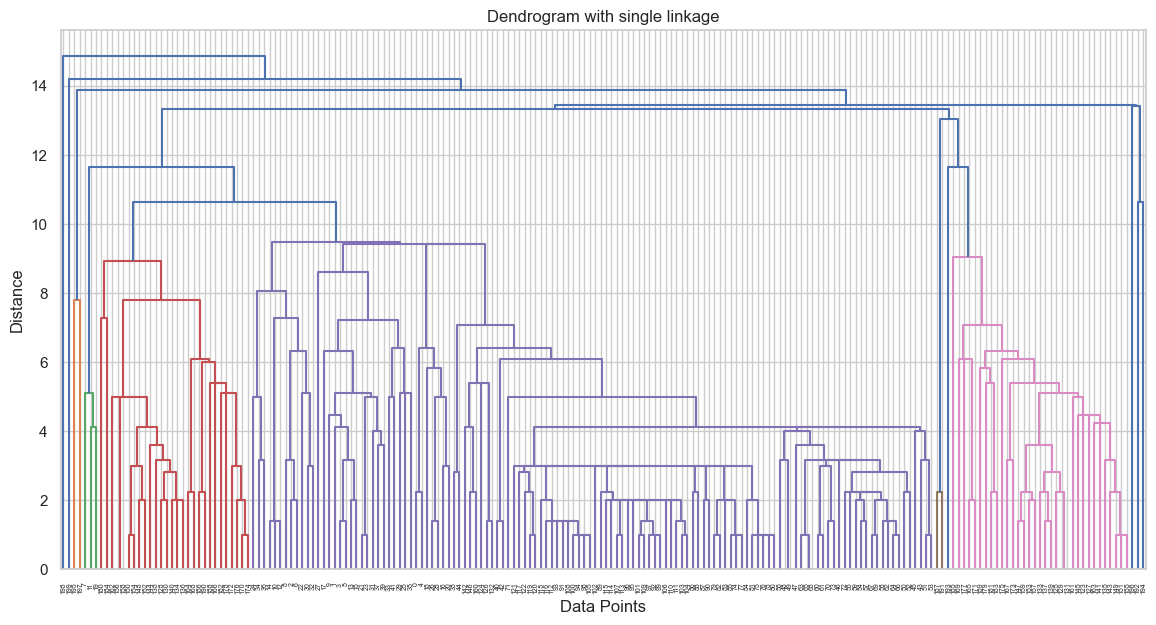

In [52]:
n_clusters = 5

for method in linkage_methods:
    
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    cluster_labels = clustering.fit_predict(X)

    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Income', y='SpendingScore', data=customer_set, hue=cluster_labels, palette='viridis')
    plt.title(f'Clustering with {method} linkage')
    plt.xlabel('Income')
    plt.ylabel('Spending Score')
    plt.legend(title='Cluster')
    plt.show()

    
    distance_matrix = hierarchy.distance.pdist(X)
    linkage = hierarchy.linkage(distance_matrix, method=method)
    plt.figure(figsize=(14, 7))
    hierarchy.dendrogram(linkage)
    plt.title(f'Dendrogram with {method} linkage')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()


**Висновки з завдання 13 (детальні)**

1. Різні методи кластеризації можуть приводити до різної форми та розташування кластерів у просторі. Деякі методи утворюють більш компактні кластери, тоді як інші можуть призвести до розподілу кластерів у вигляді ланцюжка або розірваної структури.
2. Графічне зображення дендрограми допомагає зрозуміти, наскільки близько або далеко розташовані кластери. Це може бути корисним для визначення оптимальної кількості кластерів.  
